# regresion multiple

Saving ex1data2.txt to ex1data2 (3).txt
First 5 rows of the dataset:
 [[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


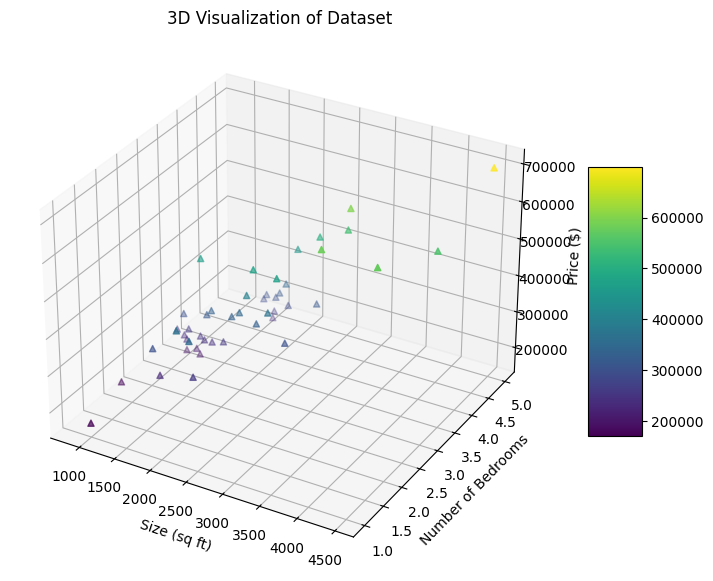

First 5 normalized examples:
 [[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


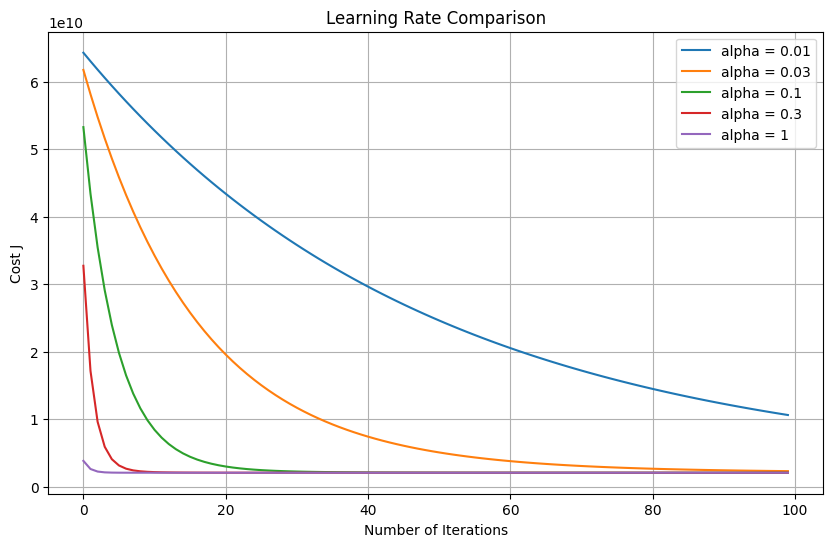

Final theta parameters:
[[340403.61773803]
 [108803.37852266]
 [ -5933.9413402 ]]
Final cost: 2043462824.6181679


In [4]:
# === 1. Import necessary libraries ===
import numpy as np
import matplotlib.pyplot as plt

# === 2. Load the dataset ===
from google.colab import files
uploaded = files.upload()  # Cargar archivo ex1data2.txt
data = np.loadtxt('ex1data2.txt', delimiter=',')

# Separate features and labels
X = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)
m = len(y)

print("First 5 rows of the dataset:\n", data[:5, :])

# === 3. Visualize the data in 3D ===
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Reshape y to 1D array for color mapping
scatter = ax.scatter(X[:, 0], X[:, 1], y.ravel(), c=y.ravel(), cmap='viridis', marker='^')

ax.set_xlabel('Size (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
plt.title('3D Visualization of Dataset')
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
plt.show()

# === 4. Feature normalization ===
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = feature_normalize(X)
X_aug = np.concatenate([np.ones((m, 1)), X_norm], axis=1)  # Add intercept term

print("First 5 normalized examples:\n", X_aug[:5, :])

# === 5. Cost function ===
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.dot(errors.T, errors)
    return J.item()

# === 6. Gradient descent ===
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        error = X.dot(theta) - y
        gradient = (1 / m) * X.T.dot(error)
        theta -= alpha * gradient
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

# === 7. Initialize and run gradient descent ===
theta = np.zeros((X_aug.shape[1], 1))
alpha_list = [0.01, 0.03, 0.1, 0.3, 1]
num_iters = 100

plt.figure(figsize=(10, 6))
for alpha in alpha_list:
    theta_init = np.zeros((X_aug.shape[1], 1))
    _, J_history = gradient_descent(X_aug, y, theta_init, alpha, num_iters)
    plt.plot(range(num_iters), J_history, label=f'alpha = {alpha}')

plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.title('Learning Rate Comparison')
plt.legend()
plt.grid(True)
plt.show()

# === 8. Final result with best alpha ===
best_alpha = 0.1
theta_init = np.zeros((X_aug.shape[1], 1))
theta_final, J_history_final = gradient_descent(X_aug, y, theta_init, best_alpha, num_iters)

print(f'Final theta parameters:\n{theta_final}')
print(f'Final cost: {J_history_final[-1]}')